In [ ]:
# 영상 길이 조정 (파일 한개)

In [66]:
import cv2

# 영상 파일 경로
source_video = "F:/behavior/original/moving/moving_80.mp4"

# 영상을 불러옴
cap = cv2.VideoCapture(source_video)

# FPS, 영상의 너비와 높이를 얻음
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 새로운 비디오 저장을 위한 VideoWriter 객체 생성
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # 'mp4v'는 mp4 파일을 위한 코덱
out = cv2.VideoWriter("F:/dataset_12_train/moving/moving_80_edited.mp4", fourcc, fps, (width, height))

# 시작 및 종료 시간 (초 단위)
start_time = 10
end_time = 40

# 시작 프레임과 종료 프레임 계산
start_frame = int(start_time * fps)
end_frame = int(end_time * fps)
current_frame = 0

# 영상을 프레임 단위로 읽음
while True:
    ret, frame = cap.read()
    
    # 읽기 성공 여부와 현재 프레임 번호 확인
    if not ret or current_frame > end_frame:
        break
    
    # 지정된 구간의 프레임만 쓰기
    if current_frame >= start_frame:
        out.write(frame)
    
    current_frame += 1

# 자원 해제
cap.release()
out.release()

In [ ]:
# 폴더에 있는 영상의 길이 조정

In [115]:
import cv2
import os
import glob

# 원본 영상 파일이 있는 폴더 경로
folder_path = "F:/broken"

# 출력 파일을 저장할 폴더 경로
output_folder = "F:/dataset_12_train/broken"

# 시작 및 종료 시간 (초 단위)
start_time = 20
end_time = 45

# 폴더에서 MP4 파일 목록을 가져옴
video_files = glob.glob(os.path.join(folder_path, '*.mp4'))

for source_video in video_files:
    cap = cv2.VideoCapture(source_video)

    # FPS, 영상의 너비와 높이를 얻음
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # 원본 파일명에서 폴더 경로 제거
    filename = os.path.basename(source_video)

    # 출력 파일 경로 생성 (원본 파일명에 "_edited" 추가)
    output_video = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_edited.mp4")

    # 새로운 비디오 저장을 위한 VideoWriter 객체 생성
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    # 시작 및 종료 프레임 계산
    start_frame = int(start_time * fps)
    end_frame = int(end_time * fps)
    current_frame = 0

    while True:
        ret, frame = cap.read()

        if not ret or current_frame > end_frame:
            break

        if current_frame >= start_frame:
            out.write(frame)

        current_frame += 1

    cap.release()
    out.release()

    print(f"Processed {source_video} -> {output_video}")

Processed F:/broken\broken_81.mp4 -> F:/dataset_12_train/broken\broken_81_edited.mp4
Processed F:/broken\broken_82.mp4 -> F:/dataset_12_train/broken\broken_82_edited.mp4
Processed F:/broken\broken_83.mp4 -> F:/dataset_12_train/broken\broken_83_edited.mp4
Processed F:/broken\broken_84.mp4 -> F:/dataset_12_train/broken\broken_84_edited.mp4
Processed F:/broken\broken_85.mp4 -> F:/dataset_12_train/broken\broken_85_edited.mp4
Processed F:/broken\broken_86.mp4 -> F:/dataset_12_train/broken\broken_86_edited.mp4
Processed F:/broken\broken_87.mp4 -> F:/dataset_12_train/broken\broken_87_edited.mp4
Processed F:/broken\broken_88.mp4 -> F:/dataset_12_train/broken\broken_88_edited.mp4
Processed F:/broken\broken_89.mp4 -> F:/dataset_12_train/broken\broken_89_edited.mp4
Processed F:/broken\broken_90.mp4 -> F:/dataset_12_train/broken\broken_90_edited.mp4
Processed F:/broken\broken_91.mp4 -> F:/dataset_12_train/broken\broken_91_edited.mp4
Processed F:/broken\broken_92.mp4 -> F:/dataset_12_train/broken\b

In [ ]:
# 두 개의 피클 데이터 하나로 만들기

In [1]:
import pickle

# 첫 번째 pickle 파일 로드
with open("D:/pickle_data_13/buying.pkl", 'rb') as file:
    data1 = pickle.load(file)

# 두 번째 pickle 파일 로드
with open("D:/pickle_data_14/buying.pkl", 'rb') as file:
    data2 = pickle.load(file)

# 두 데이터를 결합
combined_data = data1 + data2

# 결합된 데이터를 새로운 pickle 파일에 저장
with open("D:/pickle_data_16/buying.pkl", 'wb') as file:
    pickle.dump(combined_data, file)


In [ ]:
# 이미지 넘버링import os

In [4]:

import os

folder_path = "D:/dataset_12_train/theft"

png_files = [f for f in os.listdir(folder_path) if f.endswith('.mp4')]
png_files.sort()  # 파일을 정렬하여 이름을 순차적으로 변경합니다.

for i, file in enumerate(png_files, start=1):
    # 새 파일명 설정 (1.png, 2.png, ...)
    new_file_name = f"theft_{i}.mp4"
    # 파일 이름 변경
    os.rename(os.path.join(folder_path, file), os.path.join(folder_path, new_file_name))

print("파일 이름 변경 완료!")

파일 이름 변경 완료!


In [ ]:
# 파일 길이 조정하기

In [11]:
import cv2
import os
import glob

# 원본 영상 파일이 있는 폴더 경로
folder_path = "D:/normalpay"

# 출력 파일을 저장할 폴더 경로
output_folder = "D:/dataset_12_train/buying_edit"

# 시작 및 종료 시간 (초 단위)
start_time = 5
end_time = 30

# 폴더에서 MP4 파일 목록을 가져옴
video_files = glob.glob(os.path.join(folder_path, '*.mp4'))

for source_video in video_files:
    cap = cv2.VideoCapture(source_video)

    # FPS, 영상의 너비와 높이를 얻음
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # 원본 파일명에서 폴더 경로 제거
    filename = os.path.basename(source_video)

    # 출력 파일 경로 생성 (원본 파일명에 "_edited" 추가)
    output_video = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_edited.mp4")

    # 새로운 비디오 저장을 위한 VideoWriter 객체 생성
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    # 시작 및 종료 프레임 계산
    start_frame = int(start_time * fps)
    end_frame = int(end_time * fps)
    current_frame = 0

    while True:
        ret, frame = cap.read()

        if not ret or current_frame > end_frame:
            break

        if current_frame >= start_frame:
            out.write(frame)

        current_frame += 1

    cap.release()
    out.release()

    print(f"Processed {source_video} -> {output_video}")

Processed D:/normalpay\buying_30.mp4 -> D:/dataset_12_train/buying_edit\buying_30_edited.mp4
Processed D:/normalpay\buying_31.mp4 -> D:/dataset_12_train/buying_edit\buying_31_edited.mp4
Processed D:/normalpay\buying_32.mp4 -> D:/dataset_12_train/buying_edit\buying_32_edited.mp4
Processed D:/normalpay\buying_33.mp4 -> D:/dataset_12_train/buying_edit\buying_33_edited.mp4
Processed D:/normalpay\buying_34.mp4 -> D:/dataset_12_train/buying_edit\buying_34_edited.mp4
Processed D:/normalpay\buying_35.mp4 -> D:/dataset_12_train/buying_edit\buying_35_edited.mp4
Processed D:/normalpay\buying_36.mp4 -> D:/dataset_12_train/buying_edit\buying_36_edited.mp4
Processed D:/normalpay\buying_37.mp4 -> D:/dataset_12_train/buying_edit\buying_37_edited.mp4
Processed D:/normalpay\buying_45.mp4 -> D:/dataset_12_train/buying_edit\buying_45_edited.mp4
Processed D:/normalpay\buying_46.mp4 -> D:/dataset_12_train/buying_edit\buying_46_edited.mp4
Processed D:/normalpay\buying_47.mp4 -> D:/dataset_12_train/buying_edi

In [69]:
import cv2
import os
import numpy as np
import pickle

In [70]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # GPU 사용 비활성화

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # 메모리 증가 허용
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [ ]:
# 시퀀스 구성 및 피클 파일 저장

In [116]:
sequence_length = 30
overlap = 10
video_top_folder = "F:/broken"
pickle_folder = "F:/pickle_data_18_new_seq"

In [12]:
# 수정된 코드. 
# 시퀀스가 지정된 길이에 도달하거나 비디오의 끝에 도달한 경우 두 카테고리의 프레임이 혼합되지 않도록 코드 수정!!!

In [117]:
def frame_generator(video_path):
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        img_width = 100
        img_height = 100
        frame_resized = cv2.resize(gray_frame, (img_width, img_height))
        frame_array = np.array(frame_resized) / 255.0
        yield frame_array
    cap.release()

def process_video(video_path, sequence_length, overlap, pickle_folder):
    frame_count = 0
    sequences = []
    frame_gen = frame_generator(video_path)

    current_sequence = []
    while True:
        try:
            frame_array = next(frame_gen)
        except StopIteration:
            break

        current_sequence.append(frame_array)
        frame_count += 1

        # 시퀀스가 지정된 길이에 도달하거나 비디오의 끝에 도달한 경우
        if len(current_sequence) == sequence_length or frame_count == sequence_length:
            sequences.append(current_sequence)
            current_sequence = current_sequence[sequence_length - overlap:]
            frame_count = 0

    # 마지막 시퀀스 처리
    if len(current_sequence) > 0:
        padding_needed = sequence_length - len(current_sequence)
        padding_frames = [np.zeros_like(frame_array) for _ in range(padding_needed)]
        current_sequence.extend(padding_frames)
        sequences.append(current_sequence)

    label = os.path.splitext(os.path.basename(video_path))[0].split('_')[0]
    pickle_filename = os.path.join(pickle_folder, f'{label}.pkl')

    if os.path.exists(pickle_filename):
        with open(pickle_filename, 'rb') as f:
            existing_sequences = pickle.load(f)
            sequences = existing_sequences + sequences

    with open(pickle_filename, 'wb') as f:
        pickle.dump(sequences, f)

def process_folder(folder_path, sequence_length, overlap, pickle_folder):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            video_path = os.path.join(root, file)
            process_video(video_path, sequence_length, overlap, pickle_folder)

In [118]:
process_folder(video_top_folder, sequence_length, overlap, pickle_folder)

In [119]:
import os
import pickle
from collections import defaultdict

data_directory = "F:/pickle_data_18_new_seq"

# 각 행동별 mp4 파일 수, 시퀀스 수, 프레임 수를 저장할 딕셔너리
action_stats = defaultdict(lambda: {'sequences': 0, 'frame_count': 0})

for filename in os.listdir(data_directory):
    if filename.endswith(".pkl"):
        action = filename.split('_')[0]  # 파일명에서 행동 추출

        with open(os.path.join(data_directory, filename), 'rb') as f:
            sequences = pickle.load(f)
            action_stats[action]['sequences'] += len(sequences)
            action_stats[action]['frame_count'] += sum(len(seq) for seq in sequences)
            #action_stats[action]['mp4_count'] += 1

# 결과 출력
for action, info in action_stats.items():
    print(f"{action}: {info['sequences']} sequences, {info['frame_count']} frames")
    

broken.pkl: 384 sequences, 11520 frames
buying.pkl: 1160 sequences, 34800 frames
fight.pkl: 400 sequences, 12000 frames
moving.pkl: 400 sequences, 12000 frames
theft.pkl: 400 sequences, 12000 frames


In [ ]:
# CNN + LSTM 모델 구성

In [92]:
img_width = 100
img_height = 100
batch_size=32
sequence_length=30

In [120]:
data_directory = "F:/pickle_data_18_new_seq"

In [121]:
# 데이터 로드 함수 정의
def load_data(data_directory, max_sequences=None):
    X_sequences = []
    y_labels = []

    for filename in os.listdir(data_directory):
        if filename.endswith(".pkl"):
            action = filename.split('.')[0]

            with open(os.path.join(data_directory, filename), 'rb') as f:
                sequences = pickle.load(f)

                for sequence in sequences:
                    X_sequences.append(sequence)
                    y_labels.append(action)

                    if max_sequences and len(X_sequences) >= max_sequences:
                        return np.array(X_sequences), y_labels

    return np.array(X_sequences), y_labels

# 데이터 로드
X_sequences, y_labels = load_data(data_directory)

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


# 레이블 인코더 초기화 및 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_labels)

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_sequences, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 데이터 타입 변경 (옵션)
X_train = X_train.astype('float16')
X_val = X_val.astype('float16')

In [123]:
# 이미 X_train, X_val이 NumPy 배열인 경우, 별도의 변환은 필요 없음
# reshape 연산은 추가적인 메모리를 사용하지 않음
X_train = X_train.reshape(-1, sequence_length, img_width, img_height, 1)
X_val = X_val.reshape(-1, sequence_length, img_width, img_height, 1)

# y_train, y_val을 적절한 데이터 타입으로 변환
y_train = np.array(y_train, dtype=np.int32)
y_val = np.array(y_val, dtype=np.int32)

In [124]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding: 문자열 레이블을 숫자로 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)  # 훈련 데이터셋에서 이미 fit을 했으므로 transform만 사용

In [125]:
# 클래스 수 확인
num_classes = len(np.unique(y_train))  # 레이블의 고유한 값의 개수를 통해 클래스 수를 얻을 수 있습니다.
num_classes_val = len(np.unique(y_val))  # 검증 세트에서도 동일하게 고유한 값의 개수로 클래스 수 확인

In [126]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

In [127]:
class_labels = label_encoder.classes_
encoded_labels = label_encoder.fit_transform(y_labels)

In [128]:
class_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Class Mappings:", class_mappings)

Class Mappings: {0: 'broken', 1: 'buying', 2: 'fight', 3: 'moving', 4: 'theft'}


In [142]:
batch_size=32

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [144]:
# Define the model
model = Sequential()

# CNN layers
model.add(TimeDistributed(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), input_shape=(sequence_length, img_height, img_width, 1))) #주어진 레이어를 시간 분배형으로 적용. 동일한 레이어를 시간의 각 스텝에 적용
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
# model.add(TimeDistributed(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))) # 좀 더 복잡하고 추상적인 특징 포착
# model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))

# LSTM layers
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, dropout=0.3,return_sequences=True))
model.add(LSTM(32, dropout=0.3,return_sequences=True))
model.add(LSTM(32, dropout=0.3,return_sequences=True))#
model.add(LSTM(16, dropout=0.3,return_sequences=True))
model.add(LSTM(16, dropout=0.5))#
model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [145]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeD  (None, 30, 98, 98, 32)    320       
 istributed)                                                     
                                                                 
 time_distributed_11 (TimeD  (None, 30, 49, 49, 32)    0         
 istributed)                                                     
                                                                 
 time_distributed_12 (TimeD  (None, 30, 47, 47, 64)    18496     
 istributed)                                                     
                                                                 
 time_distributed_13 (TimeD  (None, 30, 23, 23, 64)    0         
 istributed)                                                     
                                                                 
 time_distributed_14 (TimeD  (None, 30, 33856)        

In [146]:
# Early Stopping, Model Checkpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=8)
model_checkpoint = ModelCheckpoint("F:/Models/CNN_LSTM.h5", save_best_only=True) # 가중치 저장할 수 있음

#tensorboard_callback = TensorBoard(log_dir='./logs')  # 가중치 로그 기록 함수

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, min_lr=0.00001)

In [ ]:
# 데이터제너레이터로 데이터 로드 및 증강

In [152]:
from tensorflow.keras.utils import Sequence
import cv2
import numpy as np
import random

In [155]:
class DataGenerator(Sequence):
    def __init__(self, X, y, batch_size, sequence_length, num_classes, augment=True):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.sequence_length = sequence_length
        self.num_classes = num_classes
        self.augment = augment

    def __len__(self):
        return int(np.ceil(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        batch_X = self.X[index * self.batch_size:(index + 1) * self.batch_size]
        batch_y = self.y[index * self.batch_size:(index + 1) * self.batch_size]

        X_batch_augmented = []
        for sequence in batch_X:
            if self.augment:
                sequence = self.augment_sequence(sequence)
            X_batch_augmented.append(sequence)

        return np.array(X_batch_augmented), to_categorical(batch_y, num_classes=self.num_classes)

    def augment_sequence(self, sequence):
        # 시퀀스에 적용할 증강 결정
        do_flip_lr = random.choice([True, False])

        augmented_sequence = []

        for frame in sequence:
            augmented_frame = frame.copy()

            # 좌우 반전 적용
            if do_flip_lr:
                augmented_frame = np.fliplr(augmented_frame)

            augmented_sequence.append(augmented_frame)

        return np.array(augmented_sequence)

    
# 데이터 제너레이터 인스턴스 생성
train_generator = DataGenerator(X_train, y_train_encoded, batch_size, sequence_length, num_classes)
val_generator = DataGenerator(X_val, y_val_encoded, batch_size, sequence_length, num_classes, augment=False)

In [ ]:
# 클래스 라벨 확인

In [ ]:
# 라벨링이 제대로 됐는지 테스트 하기


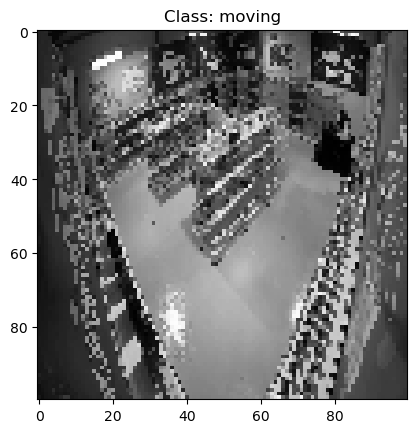

In [297]:
import matplotlib.pyplot as plt

# 클래스 3에 해당하는 시퀀스의 인덱스 찾기
class_3_indices = np.where(y_train == 3)[0]

# 클래스 3의 첫 번째 시퀀스 선택
first_sequence_idx = class_3_indices[1]

# 해당 시퀀스의 첫 번째 프레임 선택
first_frame = X_train[first_sequence_idx][0]  # sequence_length, img_width, img_height, 1

# 이미지 출력
plt.imshow(first_frame.squeeze(), cmap='gray')  # squeeze()를 사용해 채널 차원 제거
plt.title(f"Class: {class_mappings[y_train[first_sequence_idx]]}")
plt.show()


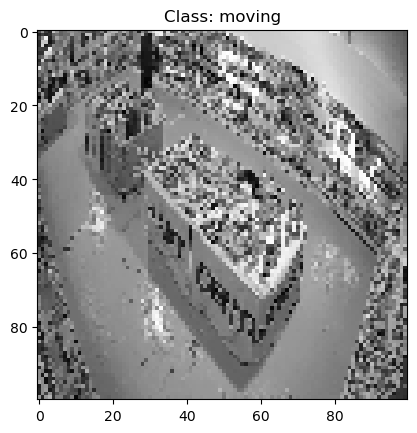

In [298]:
# 클래스 3의 마지막 시퀀스 인덱스 선택
last_sequence_idx = class_3_indices[-1]  # 마지막 인덱스

# 해당 시퀀스의 첫 번째 프레임 선택
first_frame = X_train[last_sequence_idx][0]

# 이미지 출력
plt.imshow(first_frame.squeeze(), cmap='gray')
plt.title(f"Class: {class_mappings[y_train[last_sequence_idx]]}")
plt.show()


In [300]:
total_sequence_length = sum(len(sequence) for sequence in X_sequences)
print("Total sequence length:", total_sequence_length)


Total sequence length: 82320


In [299]:
# 클래스 크기 확인
# 0번: 307
# 1번: 928
# 2번: 320
# 3번: 320
# 4번: 320

print(f"Number of sequences in class 3: {len(class_3_indices)}")


Number of sequences in class 3: 320


In [ ]:
# TensorBoard 콜백 설정
#checkpoint_callback = ModelCheckpoint('model_weights_epoch_{epoch:02d}.hdf5', 
#                                      save_weights_only=True)

#tensorboard_callback = TensorBoard(log_dir='./logs')

In [156]:
# 모델 훈련
history = model.fit(train_generator,
                    epochs=70,
                    validation_data=val_generator,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/70
69/69 [==============================] - ETA: 0s - loss: 1.3171 - accuracy: 0.4811 

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 890s 12s/step - loss: 1.3171 - accuracy: 0.4811 - val_loss: 0.9676 - val_accuracy: 0.5719 - lr: 0.0010
Epoch 2/70
69/69 [==============================] - 846s 12s/step - loss: 0.8049 - accuracy: 0.6446 - val_loss: 0.6802 - val_accuracy: 0.6630 - lr: 0.0010
Epoch 3/70
69/69 [==============================] - 859s 12s/step - loss: 0.6017 - accuracy: 0.7007 - val_loss: 0.5336 - val_accuracy: 0.7213 - lr: 0.0010
Epoch 4/70
69/69 [==============================] - 835s 12s/step - loss: 0.5917 - accuracy: 0.6897 - val_loss: 0.5264 - val_accuracy: 0.7140 - lr: 0.0010
Epoch 5/70
69/69 [==============================] - 838s 12s/step - loss: 0.5288 - accuracy: 0.7021 - val_loss: 0.5395 - val_accuracy: 0.6976 - lr: 0.0010
Epoch 6/70
69/69 [==============================] - 874s 13s/step - loss: 0.6326 - accuracy: 0.6866 - val_loss: 0.5075 - val_accuracy: 0.7067 - lr: 0.0010
Epoch 7/70
69/69 [==============================] - 995s 14s/step - loss: 0.4977 

In [157]:
# 검증 데이터 정확도 확인
loss, accuracy = model.evaluate(X_val, y_val_one_hot)
print(f'Validation accuracy: {accuracy}')
print(f'Validation loss: {loss}')

# 훈련세트 성능보다 테스트 세트 성능이 높다면 과소적합. -> 복잡한 모델 설계가 필요함.

18/18 [==============================] - 42s 2s/step - loss: 0.0378 - accuracy: 0.9945
Validation accuracy: 0.994535505771637
Validation loss: 0.03780035674571991


In [ ]:
# 성능 시각화
tensorboard --logdir=./logs

In [26]:
#X_train, X_val, y_train, y_val = train_test_split(X_sequences, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

In [27]:
# 혼동행렬

In [160]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [161]:
# 테스트 데이터로 성능 평가
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = y_val

accuracy = np.mean(y_pred_classes == y_test_classes)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))  


18/18 [==============================] - 42s 2s/step
Accuracy: 0.994535519125683
Confusion Matrix:
[[ 77   0   0   0   0]
 [  0 232   0   0   0]
 [  0   0  78   0   2]
 [  0   0   0  80   0]
 [  0   0   1   0  79]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       232
           2       0.99      0.97      0.98        80
           3       1.00      1.00      1.00        80
           4       0.98      0.99      0.98        80

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549



Displaying 3 misclassified samples.


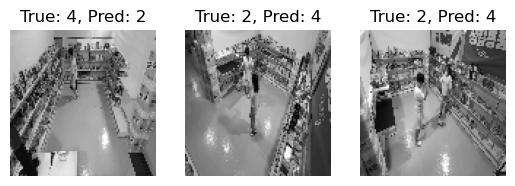

In [193]:
import matplotlib.pyplot as plt

# 잘못 분류된 샘플의 인덱스 찾기
misclassified_indices = np.where(y_pred_classes != y_test_classes)[0]

# 잘못 분류된 샘플의 수를 확인하고, 출력하고자 하는 샘플 수를 설정합니다.
n_samples = 3
print(f"Displaying {n_samples} misclassified samples.")

# 잘못 분류된 이미지와 라벨을 출력
for i, index in enumerate(misclassified_indices[:n_samples]):
    plt.subplot(1, n_samples, i+1)
    # 각 시퀀스의 첫 번째 프레임을 선택하여 표시
    plt.imshow(X_val[index][0].reshape(100, 100), cmap='gray')  # 100, 100은 이미지 크기에 따라 조정하세요.
    plt.title(f"True: {y_test_classes[index]}, Pred: {y_pred_classes[index]}")
    plt.axis('off')

plt.show()


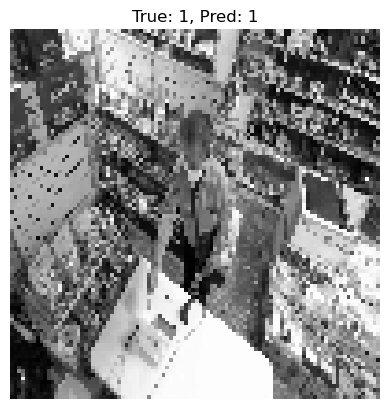

In [205]:
import matplotlib.pyplot as plt

# 정확하게 분류된 샘플의 인덱스 찾기
correct_indices = np.where(y_pred_classes == y_test_classes)[0]

# 정확하게 분류된 샘플 중 하나를 선택하여 출력
# 예를 들어, 첫 번째 정확하게 분류된 샘플을 선택할 수 있습니다.
index = correct_indices[31]

# 시각화
plt.imshow(X_val[index][0].reshape(100, 100), cmap='gray')  # 여기서 100, 100은 이미지 크기에 따라 조정
plt.title(f"True: {y_test_classes[index]}, Pred: {y_pred_classes[index]}")
plt.axis('off')
plt.show()

In [ ]:
# 라벨링 테스트하기

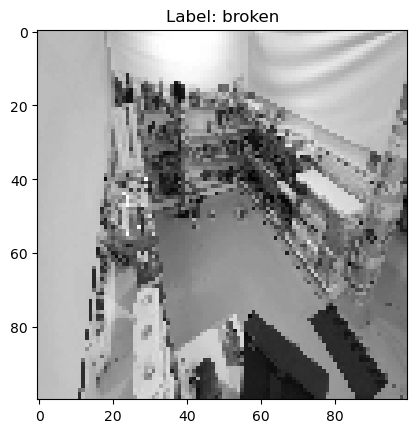

In [162]:
import matplotlib.pyplot as plt

def display_frame(sequence_idx, frame_idx, X_sequences, y_labels):
    """
    Display a specific frame from a sequence along with its label.

    :param sequence_idx: Index of the sequence in the dataset.
    :param frame_idx: Index of the frame within the sequence.
    :param X_sequences: List of all sequences.
    :param y_labels: List of labels for each sequence.
    """
    sequence = X_sequences[sequence_idx]
    label = y_labels[sequence_idx]

    if frame_idx < len(sequence):
        frame = sequence[frame_idx]
        plt.imshow(frame, cmap='gray')  # 'gray' is used for grayscale images
        plt.title(f"Label: {label}")
        plt.show()
    else:
        raise ValueError("Frame index is out of bounds for the selected sequence.")

# 예제: 0번째 시퀀스의 5번째 프레임을 화면에 출력
sequence_idx = 50
frame_idx = 2
display_frame(sequence_idx, frame_idx, X_sequences, y_labels)

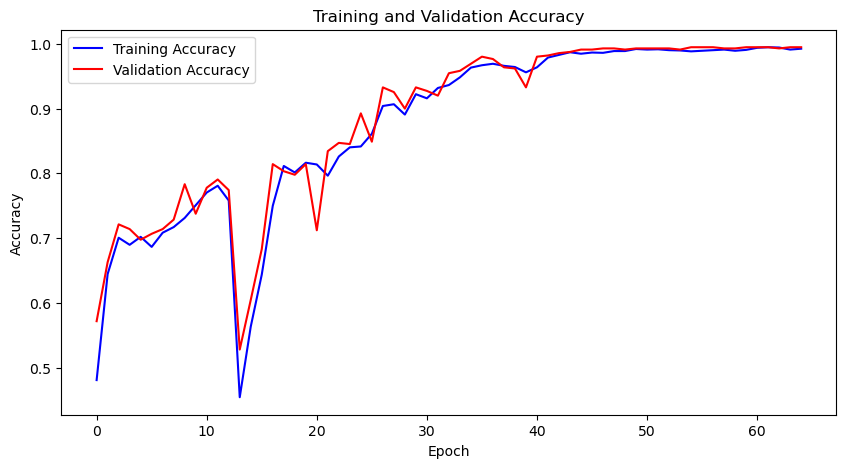

In [163]:
import matplotlib.pyplot as plt

# 훈련 및 검증 데이터의 정확도 값 저장
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터의 손실 값 저장
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 정확도 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

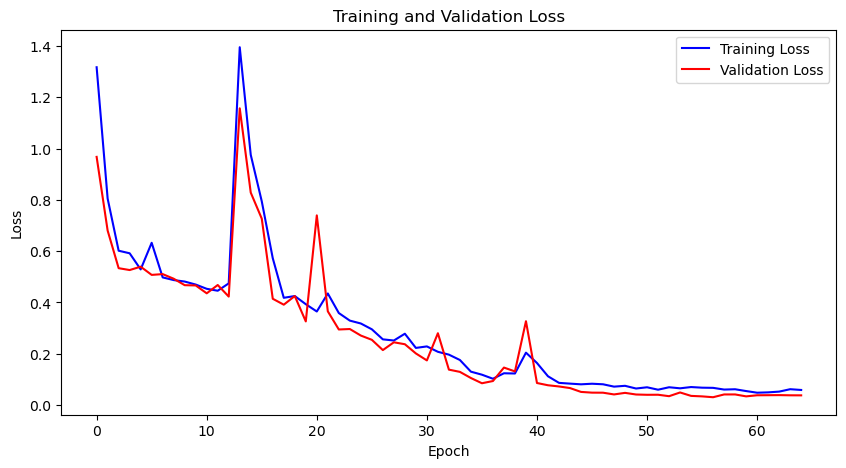

In [164]:
# 손실 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

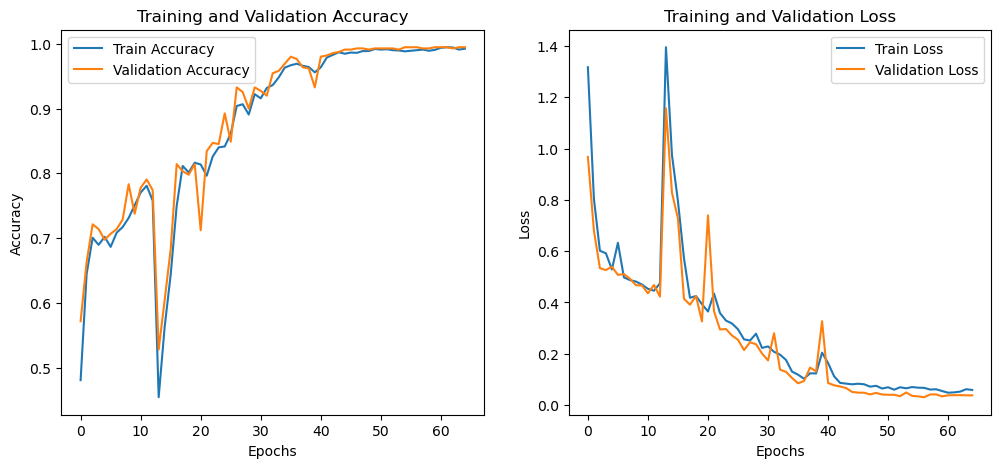

In [206]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도
plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# 개별 행동 분류

In [263]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# 테스트 영상 파일 경로
test_video_path = "F:/abnormal/abnormal_violence.mp4"

# 모델 불러오기
model_path = "F:/Models/CNN_LSTM_12.h5"
model = load_model(model_path)

# 라벨 이름 매핑
class_names = {0: 'broken', 1: 'buying', 2: 'fight', 3: 'moving', 4: 'theft'}

# VideoCapture를 사용하여 테스트 영상 열기
cap = cv2.VideoCapture(test_video_path)

# VideoCapture를 사용하여 테스트 영상의 속성 가져오기
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# VideoWriter 객체 생성
output_path = "F:/test_1.mp4"  # 결과를 저장할 파일 경로
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

In [264]:
frame_buffer = []  # 프레임을 저장할 버퍼
predictions_buffer = []  # 결과를 저장할 버퍼
while True:
    ret, frame = cap.read()
    if not ret:
        break
    resized_frame = cv2.resize(frame, (100, 100))
    gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    normalized_frame = gray_frame / 255.0
    frame_buffer.append(normalized_frame.flatten())  # 특징 추출 후 버퍼에 저장
    if len(frame_buffer) == 20:  # 30프레임씩 모아서 처리
        input_data = np.array(frame_buffer)  # 20프레임을 NumPy 배열로 변환
        input_data = input_data.reshape(1, 20, 100, 100, 1)  # 모델에 입력하기 위해 형태 변환
        predictions = model.predict(input_data)  # 모델로 예측 수행
        predicted_class = class_names[np.argmax(predictions[0])]  # 예측된 클래스 이름
        predictions_buffer.append(predicted_class)  # 예측된 클래스 이름 저장
        frame_buffer = []  # 버퍼 비우기
    # 텍스트 추가
    if predictions_buffer:
        text = f"Action: {predictions_buffer[-1]}"
        cv2.putText(frame, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 3)
    # 오버레이된 프레임을 저장
    out.write(frame)
# 작업 완료 후 해제
cap.release()
out.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 115ms/step
